# Word Cloud generator
With this notebook you can generate some wordclouds rappresenting the most common words in the tweets.

Said tweets are taken from a csv and then they are cleaned from twitter specific stuff (links, emojies and so on)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [2]:
csvPath = '../../data/tweetsAU.csv' #input Path
header_list = ["Id", "Date", "Lang", "Text"] #csv headers
tweets = pd.read_csv(csvPath, names=header_list)
tweets.head()

,Id,Date,Lang,Text
0,1228556625083916289,2020-02-15 05:48:19+00:00,en,b'This is a shoutout to the dedicated business...
1,1230973454792347648,2020-02-21 21:51:56+00:00,en,b'What progress in 6 weeks - super impressive ...
2,1230766233378680832,2020-02-21 08:08:31+00:00,en,b'#COVID has bigger impact on @hkairport than ...
3,1230662277524623360,2020-02-21 01:15:26+00:00,en,b'@EndGameWW3 Qom too \xf0\x9f\x91\x80 #Iran #...
4,1232418717423652864,2020-02-25 21:34:54+00:00,en,"b'Hello, if I made a video using #COVID-19 #co..."


In [3]:
start_date = '2020-04-15'
end_date = '2021-12-31'
mask = (tweets['Date'] >= start_date) & (tweets['Date'] <= end_date)
tweets = tweets.loc[mask]

print('# of tweets left: {}'.format(tweets.shape[0]))


# of tweets left: 4989


In [4]:
def CleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove tags
    text = re.sub(r'RT[\s]+', '', text) #remove ReTweets
    text = re.sub(r'https?:\/\/\S+', '', text) #remove links
    text = re.sub(r'\\\S+', '', text) #Remove emojies and sp chars
    text = re.sub(r'#', '', text) #Remove emojies and sp chars
    text = re.sub(r'b\'', '', text) #remove the "b'"
    text = re.sub(r'b\'', '', text) #remove the "b'"
    return text

In [5]:
tweets['Text'] = tweets['Text'].apply(CleanText)
tweets.head()

,Id,Date,Lang,Text
773,1250560790534344704,2020-04-15 23:05:01+00:00,en,politas the cruelty of Gutwein COVID response....
774,1250552758970638337,2020-04-15 22:33:06+00:00,en,"b""Magistrate's scathing rebuke of first Aussie..."
775,1250526221160476673,2020-04-15 20:47:39+00:00,en,Tips for developing resilience whilst in lockd...
776,1250489267656286208,2020-04-15 18:20:49+00:00,en,Your birthday during covid is like trying to t...
777,1250400851996200960,2020-04-15 12:29:29+00:00,en,"How true. What CEO and CTO couldn do, COVID201..."


In [6]:
import pandas as pd
import nltk.corpus
nltk.download('stopwords') #download most common stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#Custon stopword to avoid trivial results
custom_stopwords = ['covid', 'stayhome', 'pandemic', 'coronavirus', 'corona', 'covid19', 'mask', 'vaccine', 'COVID']
stop_words = stopwords.words('english') + custom_stopwords


tweets['Text'] = tweets['Text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))
tweets.head()

,Id,Date,Lang,Text
773,1250560790534344704,2020-04-15 23:05:01+00:00,en,politas cruelty Gutwein response. People 60s e...
774,1250552758970638337,2020-04-15 22:33:06+00:00,en,"b""Magistrate's scathing rebuke first Aussie ja..."
775,1250526221160476673,2020-04-15 20:47:39+00:00,en,Tips developing resilience whilst lockdown/qua...
776,1250489267656286208,2020-04-15 18:20:49+00:00,en,birthday like trying take these... sun bright ...
777,1250400851996200960,2020-04-15 12:29:29+00:00,en,"true. CEO CTO do, COVID2019 done it. shown wor..."


In [8]:
def computeWordCloud(tweets, startDate, endDate, outputPath=None):
    allWords = ''.join([tweet for tweet in tweets[(tweets['Date'] > startDate) & (tweets['Date'] < endDate)]['Text']])


    wordCloud = WordCloud(width=1920,
                    height = 1080,
                    random_state=21,
                    background_color='white',
                    collocations=False).generate(allWords)

    if outputPath:
        wordCloud.to_file(outputPath)


    plt.imshow(wordCloud, interpolation= 'bilinear')
    plt.axis('off')
    plt.show()
    

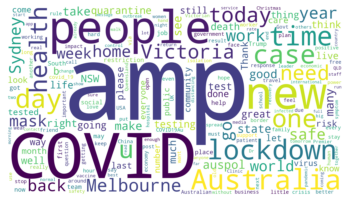

In [9]:
computeWordCloud(tweets, "2020-01-01", "2020-12-32")

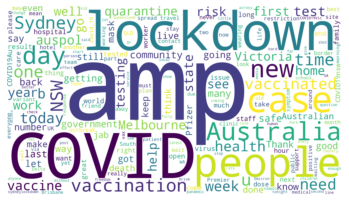

In [10]:
computeWordCloud(tweets, "2021-01-01", "2021-12-32")